<a href="https://colab.research.google.com/github/kazuki-komori/JR-ngram-similarity/blob/master/JR_ngram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

setup

In [18]:
!pip install openpyxl
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3
!pip install janome
!pip install japanize-matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.4)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+ma

#### テキストの読み込み


In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [2]:
import pandas as pd

data = pd.read_excel("data.xlsx", index_col = None)

In [57]:
bf_positive = data[data["朝食_ポジティブ"] == 1]
bf_negative = data[data["朝食_ネガティブ"] == 1]
di_positive = data[data["夕食_ポジティブ"] == 1]
di_negative = data[data["夕食_ネガティブ"] == 1]
ba_positive = data[data["風呂_ポジティブ"] == 1]
ba_negative = data[data["風呂_ネガティブ"] == 1]
se_positive = data[data["サービス_ポジティブ"] == 1]
se_negative = data[data["サービス_ネガティブ"] == 1]
pl_positive = data[data["立地_ポジティブ"] == 1]
pl_negative = data[data["立地_ネガティブ"] == 1]
am_positive = data[data["設備・アメニティ_ポジティブ"] == 1]
am_negative = data[data["設備・アメニティ_ネガティブ"] == 1]
ro_positive = data[data["部屋_ポジティブ"] == 1]
ro_negative = data[data["部屋_ネガティブ"] == 1]


In [63]:
## データを取り出す
bf_positive_txt = "".join(bf_positive["レビュー文"].values.tolist())
bf_negative_txt = "".join(bf_negative["レビュー文"].values.tolist())
di_positive_txt = "".join(di_positive["レビュー文"].values.tolist())
di_negative_txt = "".join(di_negative["レビュー文"].values.tolist())
ba_positive_txt = "".join(ba_positive["レビュー文"].values.tolist())
ba_negative_txt = "".join(ba_negative["レビュー文"].values.tolist())
se_positive_txt = "".join(se_positive["レビュー文"].values.tolist())
se_negative_txt = "".join(se_negative["レビュー文"].values.tolist())
pl_positive_txt = "".join(pl_positive["レビュー文"].values.tolist())
pl_negative_txt = "".join(pl_negative["レビュー文"].values.tolist())
am_positive_txt = "".join(am_positive["レビュー文"].values.tolist())
am_negative_txt = "".join(am_negative["レビュー文"].values.tolist())
ro_positive_txt = "".join(ro_positive["レビュー文"].values.tolist())
ro_negative_txt = "".join(ro_negative["レビュー文"].values.tolist())

In [62]:
# テキストデータを辞書型で作成
data_dic = {}
data_dic["bf"] = [bf_positive_txt, bf_negative_txt]
data_dic["di"] = [di_positive_txt, di_negative_txt]
data_dic["ba"] = [ba_positive_txt, ba_negative_txt]
data_dic["se"] = [se_positive_txt, se_negative_txt]
data_dic["pl"] = [pl_positive_txt, pl_negative_txt]
data_dic["am"] = [am_positive_txt, am_negative_txt]
data_dic["ro"] = [ro_positive_txt, ro_negative_txt]

In [38]:
f = open("/content/drive/MyDrive/JR/dbf_positive.txt", "a", encoding="UTF-8")
f.write("".join(bf_positive_list))
f.close()

18243

In [40]:
from janome.tokenizer import Tokenizer

def split_into_words(doc):
    """
    名詞だけを取り出してリストで戻す関数
    """
    try:
        t = Tokenizer(mmap=True)
        word_list = []
        # 形態素して取り出す
        for token in t.tokenize(doc):
            # 品詞の判定をして、名詞か動詞か形容詞だけを取り出す
            if (token.part_of_speech.split(",")[0] in ("名詞","動詞","形容詞")
                and  token.part_of_speech.split(",")[1] != "数"):  # ただし、数詞は使っても意味が薄いので捨てる
                # 表層形を登録する
                word_list.append(token.surface)
        return word_list
    except Exception as ex:
        print(ex)
        return []

In [46]:
# スコア算出
def scorer(p_dic, n_dic):
  counter = 0
  for p in p_dic:
    for n in n_dic:
      if p == n:
        counter += 1
  return counter / (len(p_dic) + len(n_dic))

In [87]:
scores = []
idxs = np.array(["朝食", "夕食", "風呂", "サービス", "立地", "設備・アメニティ", "部屋"])
idx = 0
for key, d in data_dic.items():
  print("------------------", idxs[idx], "----------------")
  idx += 1
  p_dic = split_into_words(d[0])
  n_dic = split_into_words(d[1])
  score = scorer(p_dic, n_dic)
  scores.append(score)
  print(score)

------------------ 朝食 ----------------
5.304789304450837
------------------ 夕食 ----------------
3.446049277824979
------------------ 風呂 ----------------
3.47638326585695
------------------ サービス ----------------
8.624403689176296
------------------ 立地 ----------------
1.661544227886057
------------------ 設備・アメニティ ----------------
5.224555735056543
------------------ 部屋 ----------------
5.733580877233697


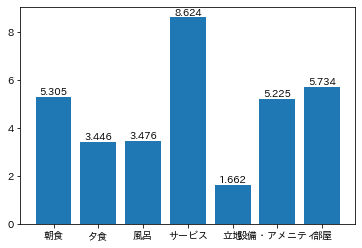

In [83]:
import numpy as np
import japanize_matplotlib 
import matplotlib.pyplot as plt
# from google.colab import files

left = np.array(["朝食", "夕食", "風呂", "サービス", "立地", "設備・アメニティ", "部屋"])
scores_rounded = np.round(scores, decimals=3)
for x, y in zip(left, scores_rounded):
    plt.text(x, y, y, ha='center', va='bottom')
plt.bar(left, scores)
plt.savefig("/content/drive/MyDrive/JR/scores.png")